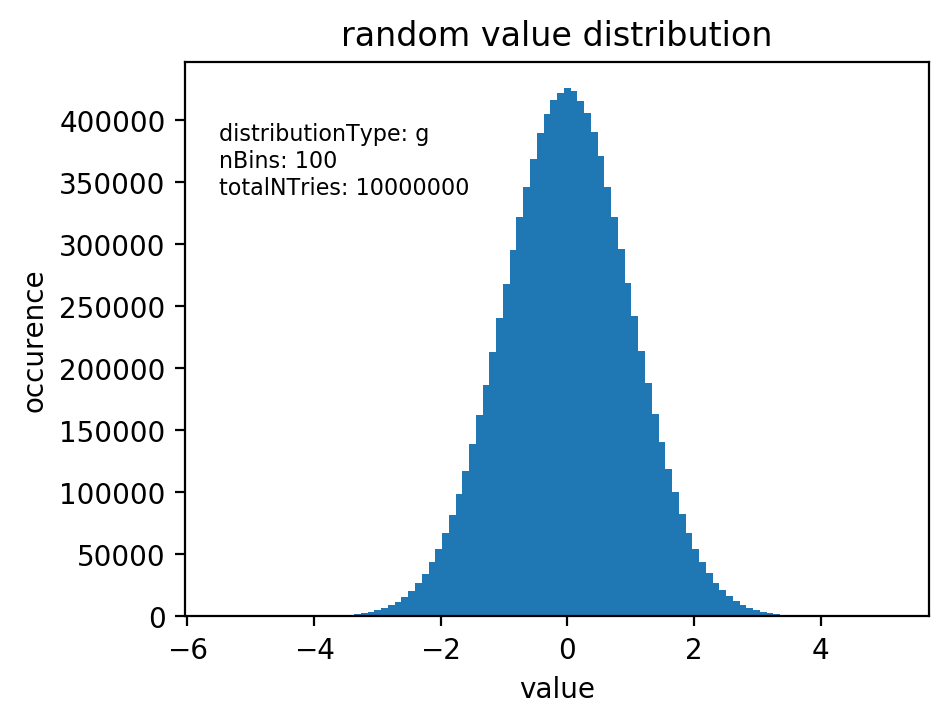

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# importing the parameter file
with open('data.txt') as f:
    lines = f.readlines()

# creating a dictonary with the parameters
params = {}
for param in lines:
    splitedS = param.split()
    params[splitedS[0]] = splitedS[1]

# checking if all important values are provided
if 'distributionType' not in params:
    print('The parameter "distributionType" is missing')
elif 'nBins' not in params:
    print('The parameter "nBins" is missing')
elif 'totalNTries' not in params:
    print('The parameter "totalNTries" is missing')
elif 'distributionType' == 'g':
    if 'widthSDFraction' not in params:
        print('The parameter "widthSDFraction" is missing')
    else:
        pass
else:
    pass

# generating random numbers and creating the histogram
np.random.seed(12424)

if params["distributionType"] == 'g':
    numbers = np.random.randn(int(params["totalNTries"]))
    rnge = (- 1 / float(params["widthSDFraction"]), 1 / float(params["widthSDFraction"]))
    hist, bin_edges = np.histogram(numbers, bins=int(params["nBins"]))
    
elif params['distributionType'] == 'u':
    numbers = np.random.rand(int(params["totalNTries"]))
    hist, bin_edges = np.histogram(numbers, bins=int(params["nBins"]))
     
else:
    print(f"{params['distributionType']} is an unknown distribution type")

# plotting the histogram
plt.hist(bin_edges[:-1], bin_edges, weights=hist)
plt.xlabel("value")
plt.ylabel("occurence")
plt.title("random value distribution")
plt.text(bin_edges[0],0.8 * max(hist),f"distributionType: {params['distributionType']} \nnBins: {params['nBins']} \ntotalNTries: {params['totalNTries']}", fontsize=8)
plt.show()
